# Practica diez

Grupo 14:
* Joaquín Ibáñez Penalva
* Aurora Zuoris

Para la realización de esta práctica se usará la librería de numpy, pandas, matplotlib, y sklearn.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [14]:
data_train = pd.read_csv('CelebA-10K-train.csv')
data_test = pd.read_csv('CelebA-10K-test.csv')

data_train.shape, data_test.shape

((5000, 514), (5000, 514))

## Ejercicio uno

In [15]:
X_train = data_train.iloc[:, 2:]
y_train = data_train.iloc[:, 1]
X_test = data_test.iloc[:, 2:]
y_test = data_test.iloc[:, 1]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5000, 512), (5000, 512), (5000,), (5000,))

,model,accuracy,recall,precision,specificity,f1_score
0,Regresión Logística,0.9126,0.898135,0.893435,0.922998,0.895779
1,Perceptón,0.8612,0.928264,0.781087,0.812994,0.848339
2,SVM,0.9462,0.945481,0.927298,0.946717,0.936301
3,KNN(5),0.8766,0.745098,0.948843,0.971124,0.834717
4,Centroide más cercano,0.8534,0.895744,0.784338,0.822963,0.836347


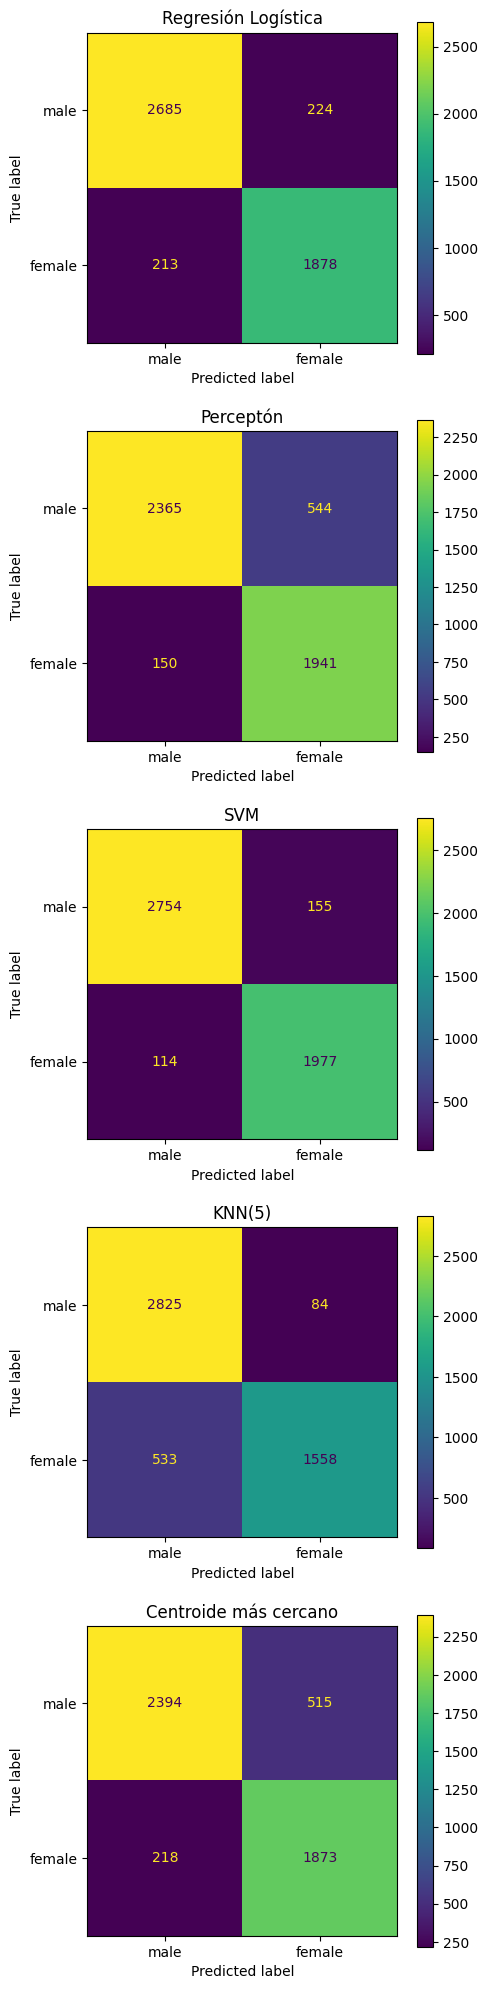

In [20]:
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


classifs = [
	('Regresión Logística', LogisticRegression()),
	('Perceptón', Perceptron()),
	('SVM', SVC()),
	('KNN(5)', KNeighborsClassifier(n_neighbors=5)),
	('Centroide más cercano', NearestCentroid())
]

from collections import defaultdict

table = defaultdict(list)

fig, ax = plt.subplots(5, 1, figsize=(5, 25))

for i, (name, model) in enumerate(classifs):
	model.fit(X_train, y_train)
	cm = confusion_matrix(y_test, model.predict(X_test))
	ConfusionMatrixDisplay(cm, display_labels=['male', 'female']).plot(ax=ax[i])
	ax[i].set_title(name)

	accuracy = np.trace(cm) / np.sum(cm)
	recall = cm[1, 1] / np.sum(cm[1, :])
	precision = cm[1, 1] / np.sum(cm[:, 1])
	specificity = cm[0, 0] / np.sum(cm[0, :])
	f1_score = 2 * precision * recall / (precision + recall)
	table['model'].append(name)
	table['accuracy'].append(accuracy)
	table['recall'].append(recall)
	table['precision'].append(precision)
	table['specificity'].append(specificity)
	table['f1_score'].append(f1_score)

pd.DataFrame(table)

## Ejercicio dos

In [ ]:
X_train = data_train.iloc[:,2:]
y_train = data_train.iloc[:,1]
X_test = data_test.iloc[:,2:]
y_test = data_test.iloc[:,1]

In [ ]:
import attrs
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import NearestCentroid
from collections import defaultdict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

models = [
    ("Logistic Regression", LogisticRegression(random_state=42)),
    ("Perceptron", Perceptron(random_state=42)),
    ("SVC", SVC(random_state=42, gamma="auto")),
    ("Gaussian", GaussianNB()),
    ("Nearest Centroid", NearestCentroid()),
]

fig, ax = plt.subplots(figsize=(7, 7))
fig2, ax2 = plt.subplots(5, 1, figsize=(5, 25))

for i, (name, model) in enumerate(models):
    model.fit(X_train, y_train)
    p = model.predict(X_test)
    c = confusion_matrix(y_test, p)
    ConfusionMatrixDisplay(c, display_labels=["male", "female"]).plot(ax=ax2[i])
    ax2[i].set_title(name)

    tn, fp, fn, tp = c.ravel()
    
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)

    ax.scatter(fpr, tpr, label=name)
    ax.plot([0, 1], [0, 1], color="black", linestyle="--")

ax.set_xlabel("FPR")
ax.set_ylabel("TPR")
ax.legend()
fig.show()

Se puede observar con la regresión logística es la que mayor ratio de verdaderos positivos tiene, así como la que menor ratio de falsos positivos tiene. Por lo tanto, es la que mejor clasifica los datos. Por otro lado, la Gausiana es la que peor clasifica los datos, ya que tiene el menor ratio de verdaderos positivos y el segundo mayor ratio de falsos positivos, solo por detrás del Nearest Centroid, sin embargo el Nearest Centroid al menos tiene una tasa de verdaderos positivos prácticamente igual que el de la regresión logística.

## Ejercicio tres

/tmp/ipykernel_34755/2818205060.py:18: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  hits = (probs < space[:, None]) == (y_test == model.classes_[0])


ValueError: ('Lengths must match to compare', (5000,), (100, 5000))

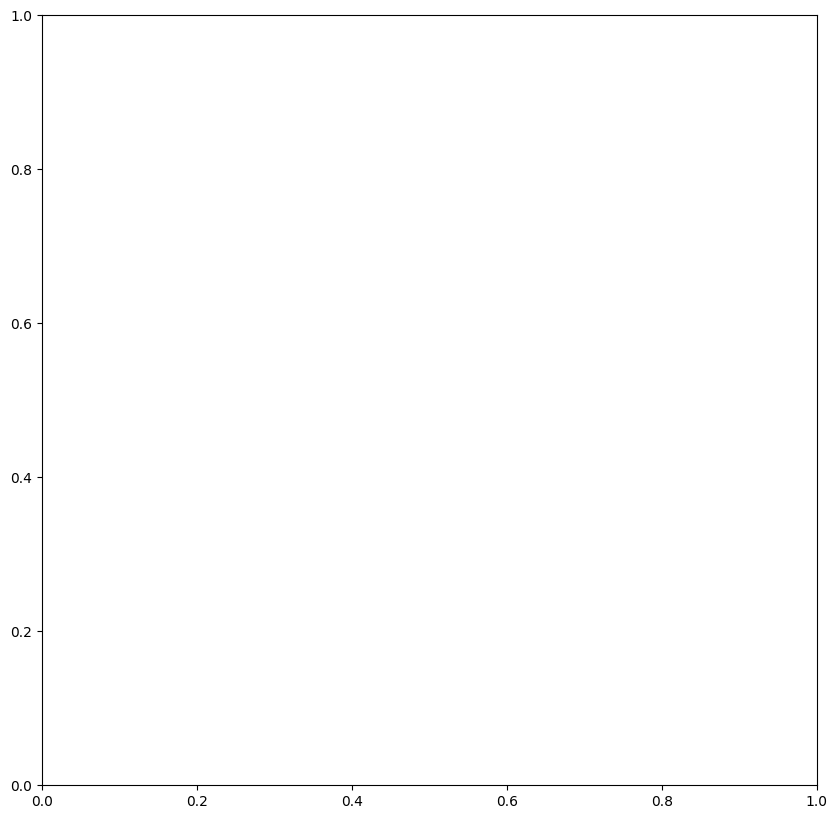

In [52]:
from numpy import linspace
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

classifs = [
	('Naive Bayes', GaussianNB()),
	('Regresión Logística', LogisticRegression()),
	('SVM', SVC(probability=True))
]

fig, ax = plt.subplots(figsize=(10, 10))

for name, model in classifs:
	model.fit(X_train, y_train)
	probs = model.predict_proba(X_test)[:, 0]
	space = np.linspace(0, 1, 100)
	hits = (probs < space[:, None]) == (y_test == model.classes_[0])[:,None]
	ax.plot(space, np.sum(hits, axis=0) / len(probs), label=name)

ax.plot([0, 1], [0, 1], 'k--', label='Aleatorio')

ax.legend()
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
ax.set_title('Curvas ROC')
fig.tight_layout(pad=0)
plt.show()